In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!!cd

['E:\\classroom\\ds\\mar21\\admission']

In [3]:
df = pd.read_csv("admission.csv")

In [4]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.columns

Index(['Sno', 'Gre', 'Toefl', 'Rating', 'Sop', 'Lor', 'Cgpa', 'Research',
       'Chance'],
      dtype='object')

## Data Visualization 

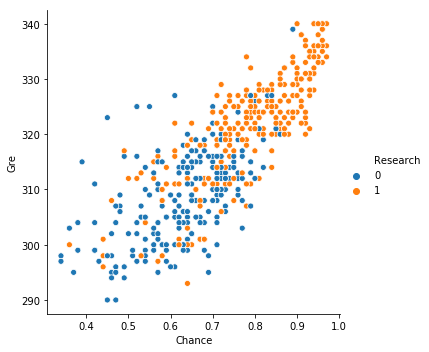

In [10]:
sns.relplot(data=df, x='Chance',y='Gre', hue='Research')

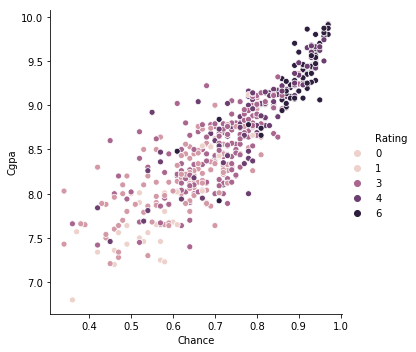

In [12]:
sns.relplot(data=df, x='Chance',y='Cgpa',hue='Rating') 

In [13]:
df.drop(columns=['Sno'], inplace=True)

In [14]:
corrmat = df.corr()

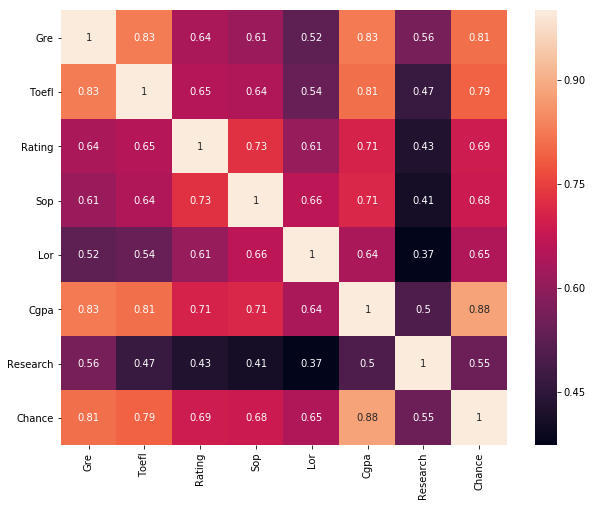

In [15]:
sns.heatmap(corrmat, annot=True)
plt.gcf().set_size_inches(10,8)

In [16]:
df.corr()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [17]:
df.corr()['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

## Build Machine Learning Model 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
y = df['Chance']

In [22]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [23]:
## Fit model or Training Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
## Evaluate Model using test data 
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.7664048993199386

## Evaluate Model 

In [104]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 0.00
R2 Score: 0.77
Mean Absolute Error : 0.05


## Pickle model 

In [40]:
pd.to_pickle(model,'admission/LR_model.pickle')

## Test Model on user input

In [86]:
# Unpickle model and use it for predicting probability 
model = pd.read_pickle('admission/LR_model.pickle')

In [103]:
data = [295,120,4,4.5,4.5,7,1]
result = model.predict([data])
print(f"Probability of getting admission is : {result[0]*100}% ")

Probability of getting admission is : 56.58841331846682% 


In [59]:
prompts = ['GRE','TOEFL','University Rating','SOP','LOR','CGPA','Research']
data = []
for p in prompts:
    data.append( input('Enter ' + p + ' : '))

# convert all values to float
for idx,value in enumerate (data):
    data[idx] = float(value)    

    
result = model.predict([data])
print(f"Probability of getting admission is : {result[0]*100}% ")

Enter GRE :  320
Enter TOEFL :  110
Enter University Rating :  2
Enter SOP :  4
Enter LOR :  4
Enter CGPA :  9
Enter Research :  1


In [60]:
result = model.predict([data])
print(f"Probability of getting admission is : {result[0]*100}% ")

Probability of getting admission is : 80.0247871896702% 


## Using Decision Tree 

In [114]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [115]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.546271776005955

In [116]:
X = df[['Gre','Toefl','Cgpa','Research']]
y = df['Chance']

In [117]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [118]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [119]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.5461572596229549

## K-Neighbours algorithm

In [123]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
y = df['Chance']

In [124]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [125]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [126]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.5876265048168453

### Using Classification 

In [151]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
df['result'] = df['Chance'] > 0.80
y = df['result']

In [152]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
y_pred = model.predict(X_test)

In [156]:
# Display consfusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[77,  1],
       [ 0, 22]], dtype=int64)

In [168]:
data = [325,130,5,4.5,4.5,8,0]
result = model.predict([data])
print(f"Will get admission ? : {result[0]}")

Will get admission ? : True
